In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = keras.datasets.fashion_mnist

# Cargamos la data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ["Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]

4422102/4422102 [==============================] - 0s 0us/step


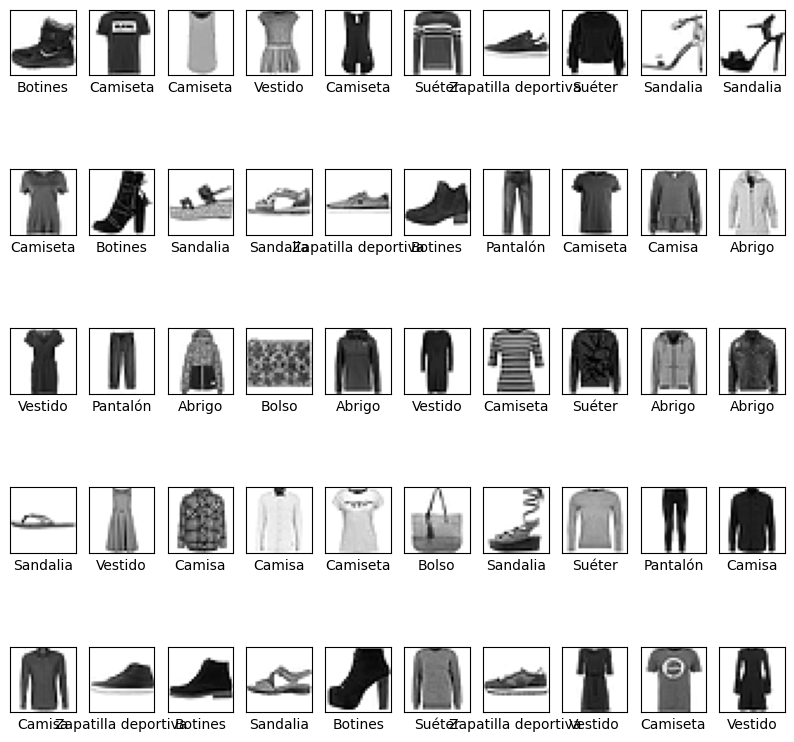

In [4]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Capa de entrada Flatten => aplanar 28x28 = 784
    keras.layers.Dense(150, activation="relu"), # Capa oculta
    keras.layers.Dense(10, activation="softmax") # Capa de salida
])


In [6]:

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [7]:

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5153 - accuracy: 0.8206 - val_loss: 0.4345 - val_accuracy: 0.8458
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3906 - accuracy: 0.8587 - val_loss: 0.3901 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3471 - accuracy: 0.8735 - val_loss: 0.4003 - val_accuracy: 0.8558
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3213 - accuracy: 0.8810 - val_loss: 0.3452 - val_accuracy: 0.8779
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3018 - accuracy: 0.8886 - val_loss: 0.3323 - val_accuracy: 0.8803
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2875 - accuracy: 0.8926 - val_loss: 0.3455 - val_accuracy: 0.8755
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2760 - accuracy: 0.8989 - val_loss: 0.3293 - val_accur

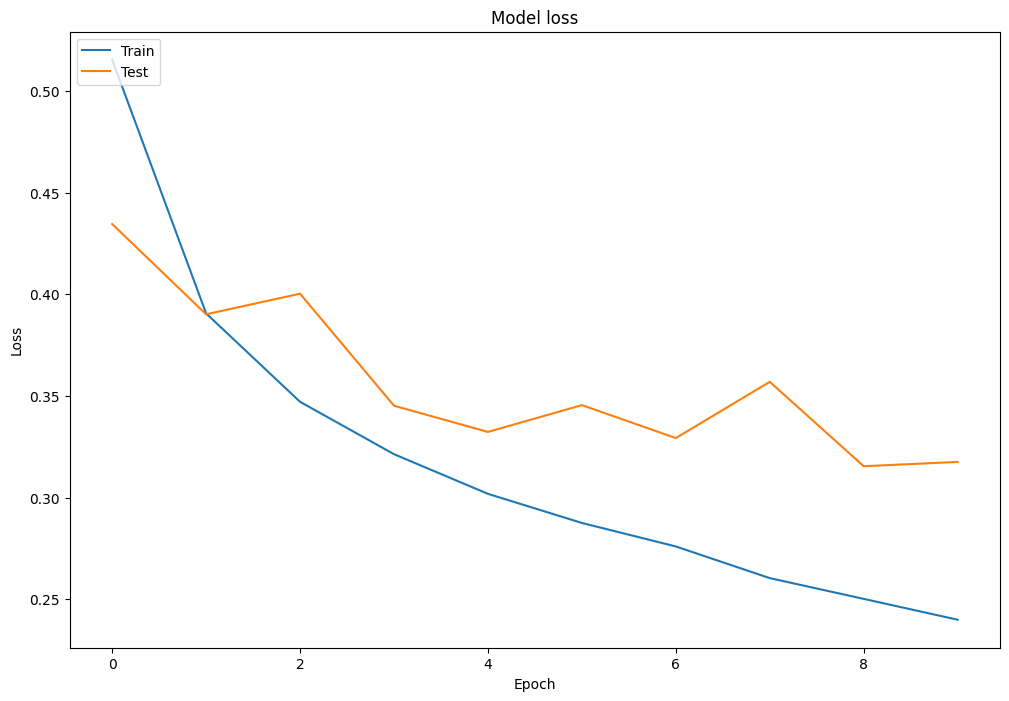

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')
plt.show()

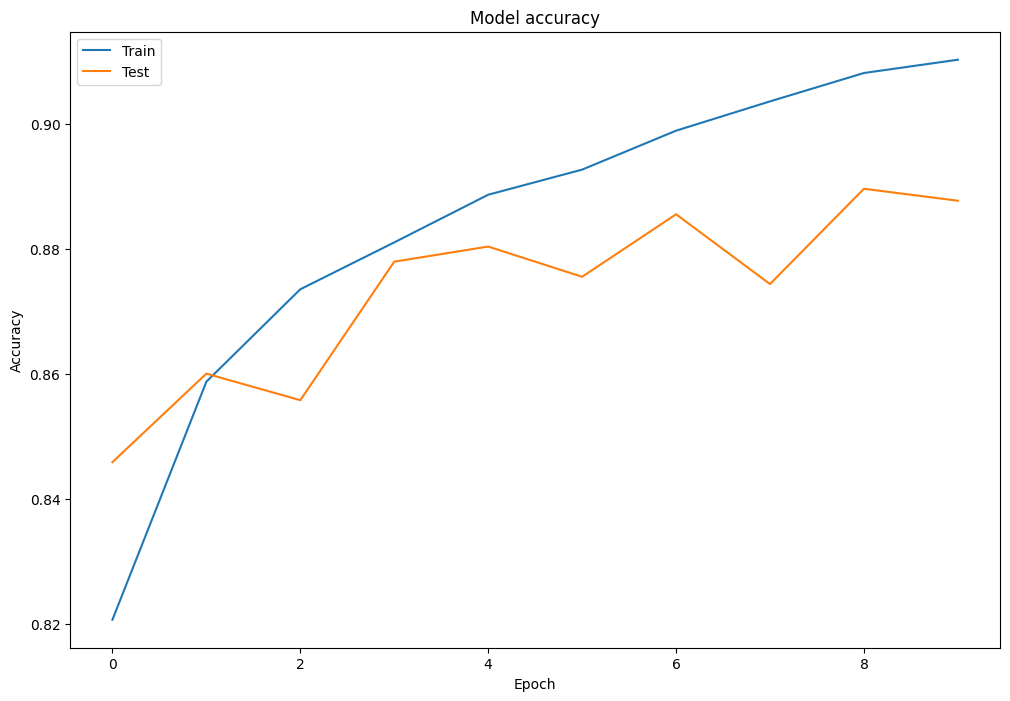

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')

In [12]:

# Evaluación
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Precisión  ", test_acc)

# Predicción
predictions = model.predict(test_images)
print("Predicción  ", np.argmax(predictions[0]))



313/313 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8798
Precisión   0.879800021648407
313/313 [==============================] - 1s 2ms/step
Predicción   9


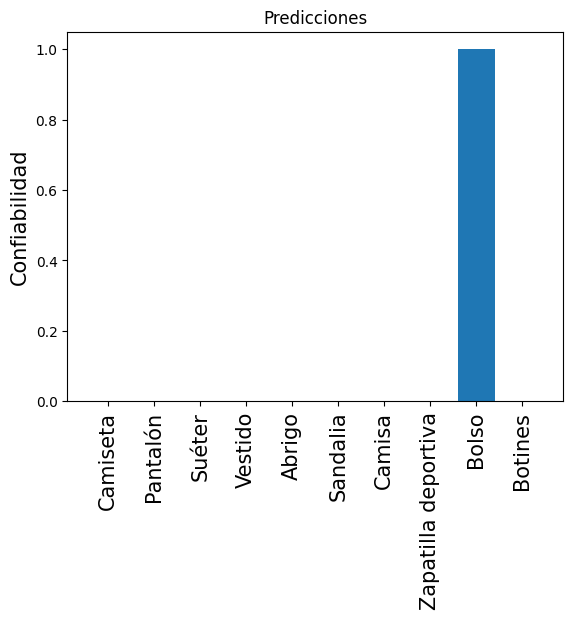

In [13]:
img_predict = predictions[30]

index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel("Confiabilidad", fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title("Predicciones")
plt.show()

Redes Neuronales en Python: Las redes neuronales son un modelo de aprendizaje automático inspirado en la estructura del cerebro humano. Se componen de capas de nodos, o "neuronas", que procesan información de manera conjunta para realizar tareas de predicción. Python es uno de los lenguajes de programación más utilizados en ciencia de datos debido a su simplicidad y a la cantidad de bibliotecas de aprendizaje automático que ofrece. Bibliotecas como TensorFlow, PyTorch y Keras se usan comúnmente para crear y entrenar redes neuronales en Python. Estas bibliotecas facilitan la creación de arquitecturas de red complejas y ofrecen funciones para entrenar y ajustar los modelos.

Problemas de Clasificación: En el contexto de la ciencia de datos, los problemas de clasificación implican la predicción de etiquetas categóricas, a diferencia de los problemas de regresión, que predicen valores continuos. Por ejemplo, un problema de clasificación podría ser predecir si un correo electrónico es spam o no (clasificación binaria), o identificar a qué raza de perro pertenece una imagen de un perro (clasificación multiclase). Los algoritmos de aprendizaje supervisado, que se entrenan en un conjunto de datos con etiquetas conocidas, se utilizan comúnmente para resolver problemas de clasificación.

Clasificación con Redes Neuronales: Las redes neuronales también se pueden usar para resolver problemas de clasificación. Durante el entrenamiento, la red "aprende" a partir de un conjunto de datos etiquetados, ajustando los pesos de las conexiones entre las neuronas para minimizar la diferencia entre la predicción de la red y la etiqueta real. Al final de este proceso de aprendizaje, la red neuronal debería ser capaz de predecir la etiqueta correcta para entradas nuevas y no vistas. La capa de salida en una red neuronal para clasificación generalmente tiene tantos nodos como clases de salida y utiliza una función de activación adecuada, como la función softmax, para producir una distribución de probabilidad sobre las clases de salida.